Близкие точки 612.5/612.6, 550/550.1 дают разные сечения,
надо посмотреть поближе

In [56]:
import numpy as np
import uproot
import uproot_methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplhep as hep
import re
from glob import glob
import iminuit
import probfit as pf

def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='talk', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

In [57]:
trees = [ uproot.open('/spoolA/petrov/research/outputs/19/trees/550.00_70260.root'),
         uproot.open('/spoolA/petrov/research/outputs/19/trees/550.10_70029.root')]

In [58]:
trees[0].allkeys()

[b't;1', b'pic_align;1', b'pic_mom;1', b'pic_kinfit;1']

In [59]:
t = [ tr['t'].pandas.df() for tr in trees ]

In [60]:
t[0].head()

,label,beam_energy,procedure,trigger,mass,m1,m2,mass_reco,angle_ks,theta_ks,phi_ks
entry,,,,,,,,,,,
0,550.0,549.341187,2,2,481.165405,3.501985,-29.726577,6.919127e-310,0.015354,1.492113,1.793911
1,550.0,549.341187,2,2,493.273804,-6.497999,0.984689,6.919127e-310,0.002148,1.845924,3.302353
2,550.0,549.341187,2,2,494.703888,-3.137351,-0.790437,6.919127e-310,0.005556,1.526990,4.491490
3,550.0,549.341187,2,2,497.621399,-2.291453,2.737164,6.919127e-310,0.006737,1.725203,1.404038
4,550.0,549.341187,2,2,503.018494,9.348431,-2.721347,6.919127e-310,0.012566,2.417034,4.574332


In [61]:
len(t[0])/1059, len(t[1])/1079

(1.2662889518413598, 0.3873957367933272)

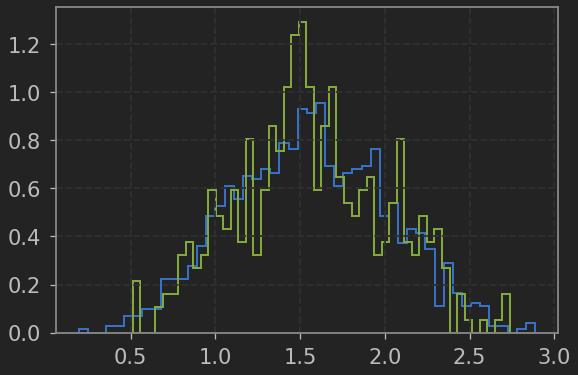

In [62]:
plt.figure(figsize=(9,6))
plt.hist(t[0].theta_ks, bins=50, density=True, histtype='step', lw=2);#, range=(450, 550));
plt.hist(t[1].theta_ks, bins=50, density=True, histtype='step', lw=2);#, range=(450, 550));

In [63]:
pm = [ tr['pic_mom'].pandas.df() for tr in trees ]

In [64]:
pm[0].head()

,align,momentum,mass,passed,m1,m2
entry,,,,,,
0,-0.580994,46.065910,536.170593,False,149.621970,-118.057561
1,0.959733,72.898636,492.930573,False,99.257242,-125.343758
2,0.818256,211.933121,532.783691,False,40.293313,6.724839
3,0.550190,24.222395,451.439728,False,98.821713,-189.302158
4,0.988910,207.707001,481.165405,True,3.501985,-29.726577


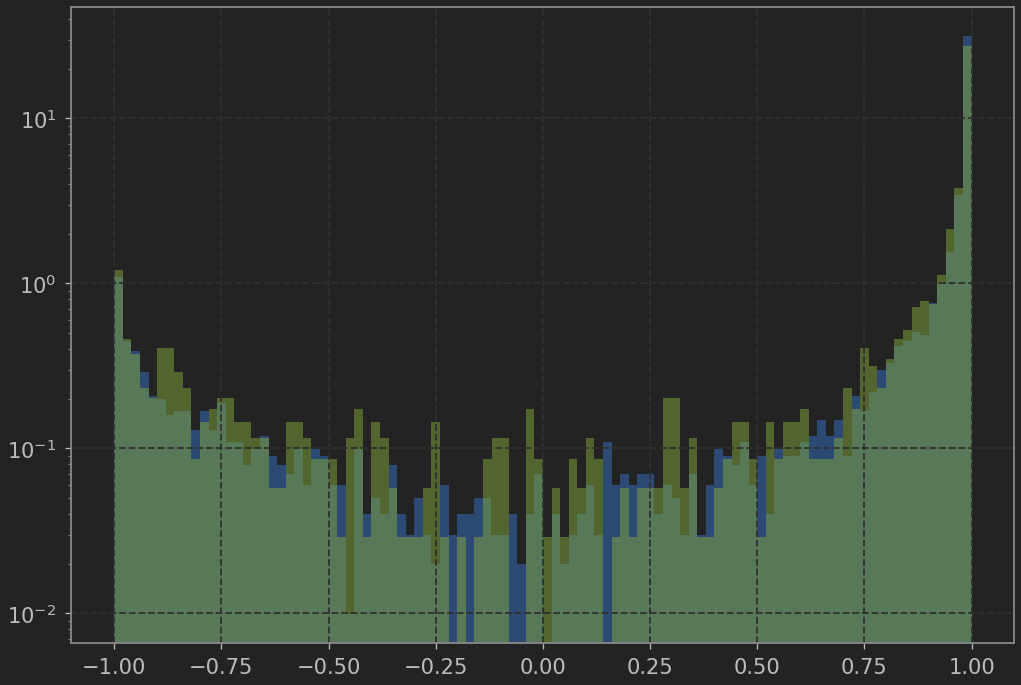

In [65]:
plt.hist(pm[0]['align'], bins=100, density=True, alpha=.5);
plt.hist(pm[1]['align'], bins=100, density=True, alpha=.5);
plt.yscale('log')

In [66]:
1378/1424, 431/496

(0.9676966292134831, 0.8689516129032258)

In [67]:
len( pm[0].query('passed&align>0.8') )/1424, len( pm[1].query('passed&align>0.8') )/496

(0.9417134831460674, 0.842741935483871)

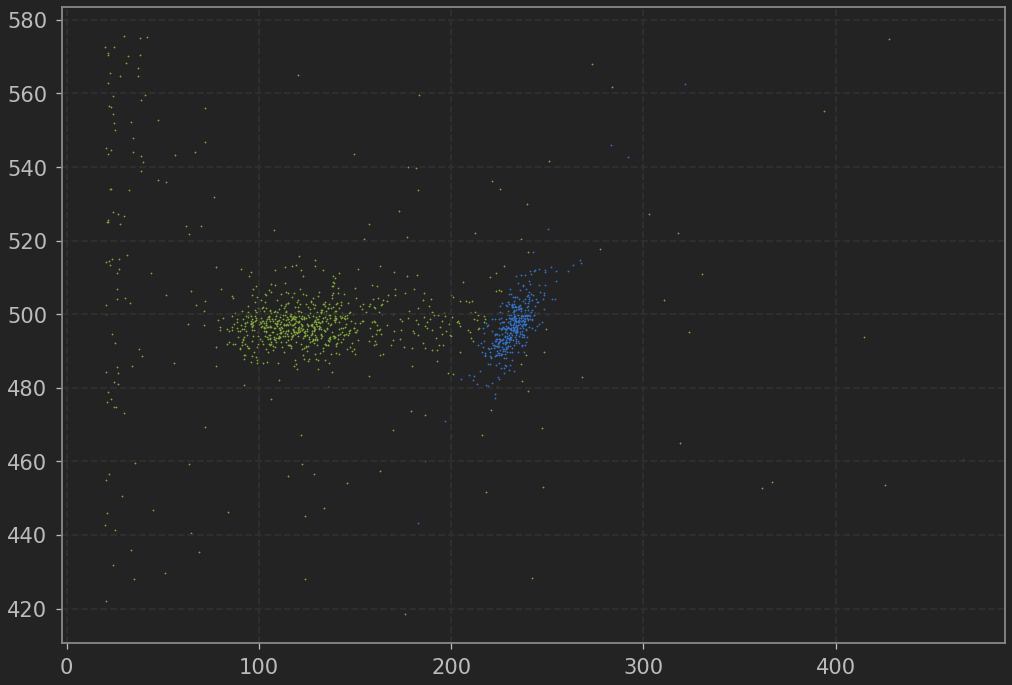

In [68]:
p = pm[1].query('align>0.8')
plt.scatter(p.query('passed')['momentum'], p.query('passed')['mass'], s=2)
plt.scatter(p.query('passed==False')['momentum'], p.query('passed==False')['mass'], s=2)
# plt.scatter(pm[1]['momentum'], pm[1]['mass'], s=2)

In [69]:
trees = [ uproot.open('/spoolA/petrov/research/outputs/others/trees/550.00_70029.root')['t'],
         uproot.open('/spoolA/petrov/research/outputs/others/trees/550.00_70260.root')['t'],
        uproot.open('/spoolA/petrov/research/outputs/others/trees/562.50_0.root')['t']]
trees = [t.pandas.df().query('(abs(mass-497)<10)|(abs(mass_reco-497)<10)')[['label', 'mass', 'mass_reco']] for t in trees]

In [94]:
for t in trees:
    t['st'] = (np.abs( t.mass - 497 )< 10)*1
    t['kf'] = (np.abs( t.mass_reco - 497 )< 10)*1
    t['both'] = (t['st'] * t['kf'])

In [71]:
for t in trees:
    s, k, sk, cov = \
t.st.mean(), t.kf.mean(), t.st.mean()*t.kf.mean(), np.cov( t[['st','kf']].values.T )[0,1]
    skcov = np.mean(t.st*t.kf)
    print( s + k - sk - cov, s + k - skcov)

1.000084576588454 0.9999999999999999
1.0000166813660156 1.0
1.0000173012892173 0.9999999999999999


In [72]:
m = []
mult = (trees[0].st==0)*(trees[0].kf==0)
for i in range(10000):
    m.append( mult.values[np.random.randint(0, len(mult)-1, (100000))].mean() )

/store17/petrov/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [73]:
mult

entry
0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Length: 401, dtype: bool

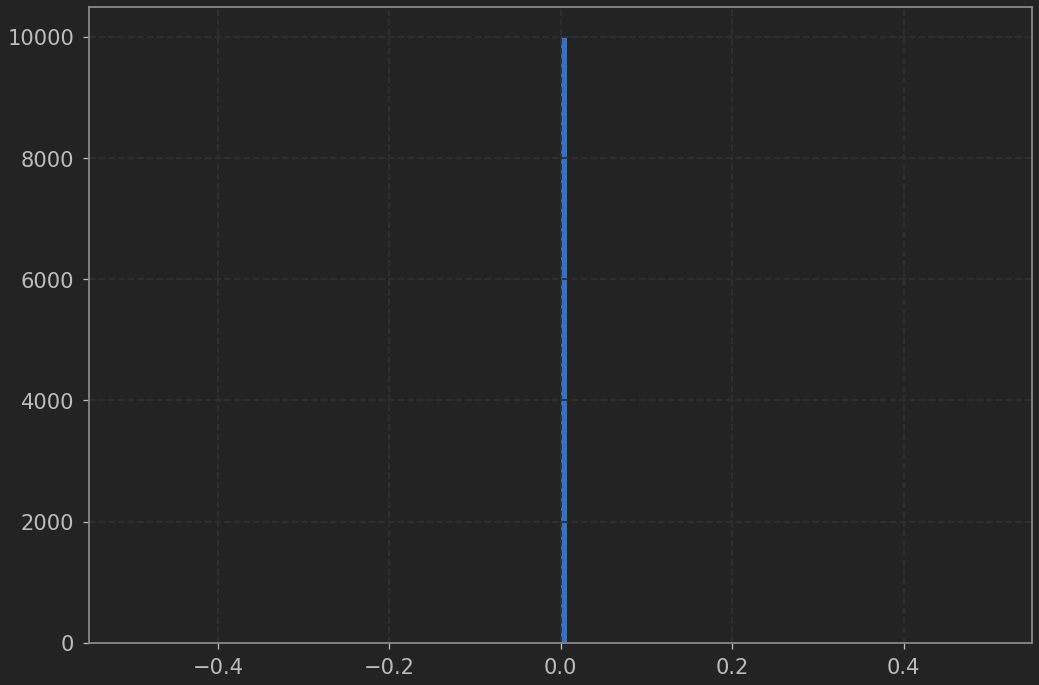

In [54]:
plt.hist(m, bins=130);

In [109]:
trees[0].st.mean()

0.9152119700748129

In [119]:
covmat = np.cov( trees[0][['st','kf']].values.T )
covmat

array([[ 0.07779302, -0.03391521],
       [-0.03391521,  0.240399  ]])

In [97]:
sm = trees[0][['st', 'kf', 'both']].sum()

In [99]:
p1, p2 = sm['both']/sm['kf'], sm['both']/sm['st']

In [113]:
p1, p2

(0.8589211618257261, 0.5640326975476839)

In [104]:
covmat[0,1]/p2*p1

-0.05164681656853706

In [117]:
(1 - np.sqrt(1 - 4*covmat[1,1]))/2

0.40201532004320933